# Estimating Gross Profit 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#estimated revenue
rev_m = 170
rev_std = 20
iterations = 1000

In [6]:
np.random.seed(0)
rev = np.random.normal(rev_m, rev_std, iterations)

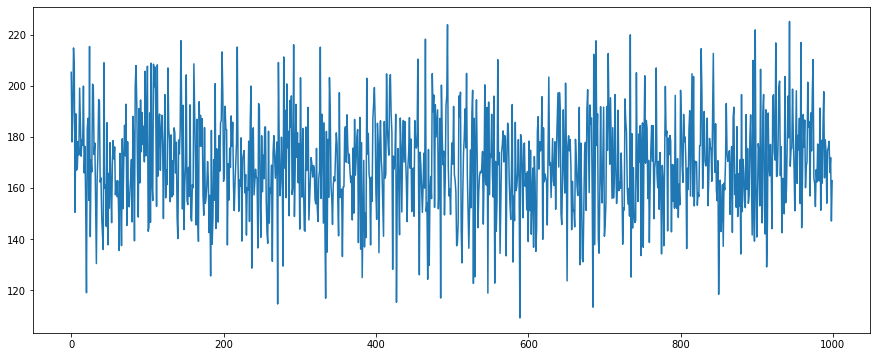

In [7]:
plt.figure(figsize = (15,6))
plt.plot(rev)
plt.show()

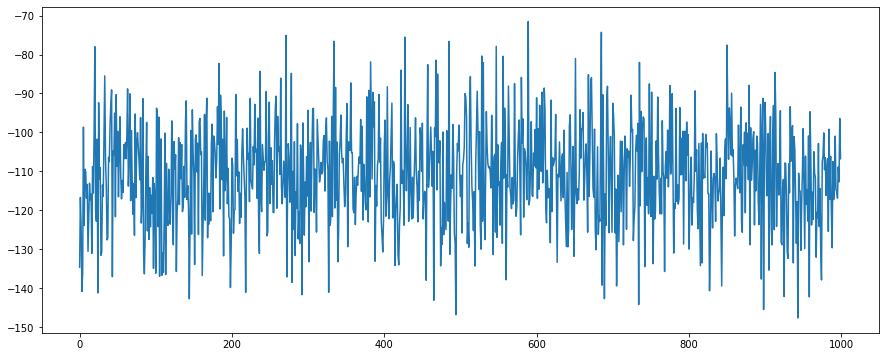

In [8]:
COGS = -(rev * np.random.normal(0.6, 0.1))

plt.figure(figsize = (15,6))
plt.plot(COGS)
plt.show()

In [9]:
COGS.mean()

-110.85796298444204

In [10]:
COGS.std()

12.941905103740426

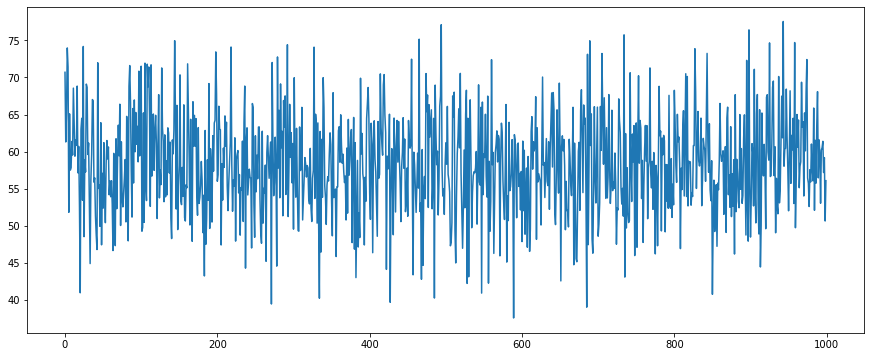

In [11]:
GP = rev + COGS

plt.figure(figsize = (15,6))
plt.plot(GP)
plt.show()

In [12]:
max(GP)

77.55527843018135

In [13]:
min(GP)

37.566573717585925

In [14]:
GP.mean()

58.23690286575405

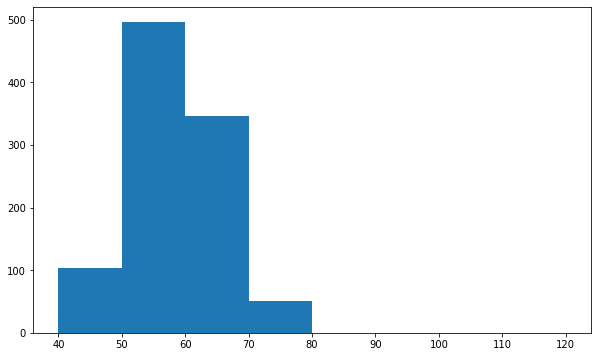

In [15]:
plt.figure(figsize = (10,6))
plt.hist(GP, bins = [40,50,60,70,80,90,100,110,120])
plt.show()

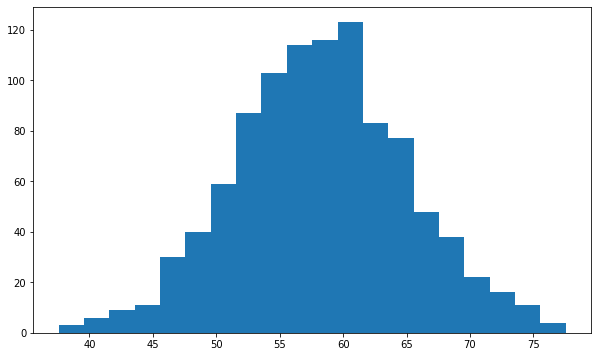

In [17]:
# alternatively (better way to present)
plt.figure(figsize = (10,6))
plt.hist(GP, bins = 20)
plt.show()

# Estimating Stock Price

In [39]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [16]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1')['Adj Close']
data                                                            

,PG
Date,
2007-01-03,43.435280
2007-01-04,43.105507
2007-01-05,42.735352
2007-01-08,42.829563
2007-01-09,42.721889
...,...
2020-03-26,107.379997
2020-03-27,110.169998
2020-03-30,115.000000


In [17]:
log_returns = np.log(data / data.shift(1))
log_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002517
...,...
2020-03-26,0.062046
2020-03-27,0.025651
2020-03-30,0.042908


In [18]:
pg_var = log_returns.var()
pg_var

PG    0.000141
dtype: float64

In [19]:
avg_return = log_returns.mean()
avg_return

PG    0.000281
dtype: float64

                                                    drift = avg_return - 0.5 * var 

In [20]:
drift = avg_return - 0.5 * pg_var
drift

PG    0.000211
dtype: float64

In [21]:
stdev = log_returns.std()
stdev

PG    0.011869
dtype: float64

In [22]:
type(drift)

pandas.core.series.Series

In [23]:
type(stdev)

pandas.core.series.Series

In [24]:
# I am going to convert pandas values into arrays
drift.values

array([0.00021074])

In [25]:
stdev.values

array([0.01186881])

In [26]:
# if one case has 90% prob., then how many deviations is it away from mean (Z in the formula)
norm.ppf(0.9)

1.2815515655446004

In [27]:
# rand(0,1)
np.random.rand(10,2)

array([[0.10522226, 0.23946672],
       [0.2135564 , 0.41498069],
       [0.0850078 , 0.20550074],
       [0.40093547, 0.08671236],
       [0.02591356, 0.1091689 ],
       [0.13578424, 0.76256069],
       [0.69008217, 0.93791703],
       [0.84188316, 0.80859099],
       [0.87116695, 0.35075658],
       [0.90034687, 0.75470944]])

In [42]:
# t_interval = the number of days for prediction
t_intervals  = 365
iterations = 1000

shock = std * Z(rand(0,1))

In [43]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00677306, 0.9966994 , 1.00695058, ..., 1.00597849, 1.024352  ,
        0.98001492],
       [0.99291603, 0.99857063, 0.97757894, ..., 0.99330042, 1.00989195,
        0.97668214],
       [0.98442446, 1.00241509, 0.99469694, ..., 0.97873492, 0.99571568,
        0.98895743],
       ...,
       [1.01275139, 0.99041519, 1.00426847, ..., 0.99124209, 0.98992182,
        0.99936584],
       [0.9971677 , 0.9891035 , 0.99013916, ..., 1.00454067, 1.00337507,
        0.98940027],
       [0.99646009, 1.00694511, 1.00940278, ..., 0.99841308, 0.99498267,
        0.99255596]])

In [44]:
current_price = data.iloc[-1]
current_price

PG    110.910004
Name: 2020-04-01 00:00:00, dtype: float64

In [45]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
price_list[0] = current_price
price_list

array([[110.91000366, 110.91000366, 110.91000366, ..., 110.91000366,
        110.91000366, 110.91000366],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [47]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [48]:
price_list

array([[110.91000366, 110.91000366, 110.91000366, ..., 110.91000366,
        110.91000366, 110.91000366],
       [110.12432096, 110.75147262, 108.4232842 , ..., 110.16695305,
        112.00711986, 108.32382011],
       [108.40907519, 111.01894706, 107.84830948, ..., 107.82424438,
        111.52724506, 107.12764635],
       ...,
       [ 86.71560047, 134.74487133, 121.50256963, ..., 200.21616933,
        147.65074313, 159.8376524 ],
       [ 86.46999598, 133.27662408, 120.30445171, ..., 201.12528548,
        148.14907522, 158.14341693],
       [ 86.16389992, 134.20224521, 121.43564807, ..., 200.80611602,
        147.40576204, 156.96619134]])

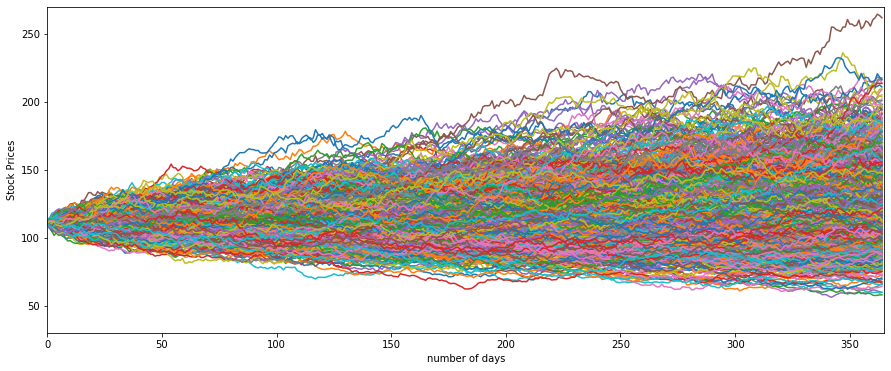

In [73]:
plt.figure(figsize = (15,6))
plt.plot(price_list)
plt.ylabel('Stock Prices')
plt.xlabel('number of days')
plt.axis([0,365, 30, 270])
plt.show()

In [54]:
price_list[364]

array([ 86.16389992, 134.20224521, 121.43564807, 136.58014449,
       109.50975785, 172.64961985,  99.32143067, 167.3357075 ,
       142.81038204, 115.57206999, 104.00413537, 113.48497227,
        81.99296964,  96.25510037, 129.00016495, 145.53657683,
       104.83983052, 143.47337375, 133.06422136,  92.10036733,
       104.32168093, 187.95671324, 125.71866911, 105.06168486,
       125.15586127, 119.9270314 , 119.59589166, 128.70023052,
       102.14082446, 131.30877957,  88.60162013,  69.21787745,
       131.28073741,  91.52348122, 120.77729843, 112.27907318,
       120.45925502, 110.72383404, 125.14261525, 125.07346163,
       117.03300704, 157.14306104, 138.76527238, 174.97241664,
       105.54508604, 112.90155251, 108.93132994, 102.55588225,
       107.17042703, 106.10815906, 128.16235253, 122.00155884,
       177.99289596, 160.9131549 , 108.76732879,  98.58113032,
       177.30600827, 124.65902656,  98.82725312, 127.80162956,
       123.49702626, 139.22010879, 148.43416434, 107.76

In [57]:
#average predicted stock price for year end
sim_price = price_list[364].mean()

In [87]:
#according to simulation we make this yearly return:
year_return = round((sim_price / current_price - 1), 4)
year_return

PG    0.118
Name: 2020-04-01 00:00:00, dtype: float64

In [124]:
max_price = price_list[:, 0:999].max()
min_price = price_list[:, 0:999].min()

In [125]:
max_price

264.4549684257852

In [126]:
min_price

56.123566967637686